# Line Graph for singal feature
First the following are some simple line graphs showing the changes of median person earning 
and household income for each state through years.

In [3]:
import pandas as pd
mpe = pd.read_csv("data/Median Personal Earnings.csv")

mpe=mpe.iloc[:,1:]
mpe

mpewithneg=mpe.loc[(mpe['State Code']=='Median Personal Earnings')]


# FIPS Code	State Name

1	ALABAMA

2	ALASKA

4	ARIZONA

5	ARKANSAS

6	CALIFORNIA

8	COLORADO

9	CONNECTICUT

10	DELAWARE

11	DISTRICT OF COLUMBIA

12	FLORIDA

13	GEORGIA

15	HAWAII

16	IDAHO

17	ILLINOIS

18	INDIANA

19	IOWA

20	KANSAS

21	KENTUCKY

22	LOUISIANA

23	MAINE

24	MARYLAND

25	MASSACHUSETTS

26	MICHIGAN

27	MINNESOTA

28	MISSISSIPPI

29	MISSOURI

30	MONTANA

31	NEBRASKA

32	NEVADA

33	NEW HAMPSHIRE

34	NEW JERSEY

35	NEW MEXICO

36	NEW YORK

37	NORTH CAROLINA

38	NORTH DAKOTA

39	OHIO

40	OKLAHOMA

41	OREGON

42	PENNSYLVANIA

44	RHODE ISLAND

45	SOUTH CAROLINA

46	SOUTH DAKOTA

47	TENNESSEE

48	TEXAS

49	UTAH

50	VERMONT

51	VIRGINIA

53	WASHINGTON

54	WEST VIRGINIA

55	WISCONSIN

56	WYOMING

72	PUERTO RICO

78	VIRGIN ISLANDS

Brazilian Median Personal Earnings in MA,OKLAHOMA,WASHINGTON


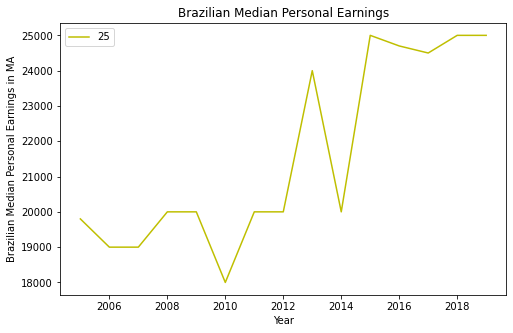

In [4]:
import matplotlib.pyplot as plt
import numpy as np

coArray = ['y','m','c','r','g','b','k']

def plotmpe(statecode):
    plt.figure(figsize=(8,5))
    plt.xlabel('Year')
    plt.ylabel('Brazilian Median Personal Earnings in MA')
    plt.title("Brazilian Median Personal Earnings")
    ax = plt.gca()
    for i in statecode:
        coPos= np.random.randint(len(coArray))
        coVal= coArray[coPos]
        mpewithneg.plot(kind='line',x='Year',y=str(i), color=coVal, ax=ax)
        #plt.plot(mpewithneg['Year'],mpewithneg[str(i)],color=coVal,ax=ax)
    plt.savefig("Brazilian Median Personal Earnings in MA.png")
print("Brazilian Median Personal Earnings in MA,OKLAHOMA,WASHINGTON")
#statecode=[25,40,53]
statecode=[25]
plotmpe(statecode)



In [36]:
eo = pd.read_csv("./Employment by Occupation.csv")

# Feature Examination
After these simple exercises, I want to write codes that can answer the following questions:

1. find top 5 most populated employment by industry growth over the years using a stacked chart


2. predict household income(see if this feature is related to personal earnings and employment(like: if personal earnings is positively proportional to household income; if employment with high population means high income; if we want to make a prediction model, more features are needed. So right now I will just examine the law in each feature.)

# 1. Employment by Occupation
First let's find the top 5 populated employment by occupation over years. One part for the Unied States and another part for MA.

The occupations are categorized into:
    
Management & Professional

Services

Sales and Office

Construction and Extracion

Maintenance and Repair

Production, Transportation and Material Moving

Educational Instruction and Library Occupations

Arts, Design, Entertainment, Sports, and Media Occupations

Healthcare Practitioner and Technical Occupations

Other

# For United States

In [37]:
eo['TotalPopulation'] = eo.iloc[:,3:].sum(axis=1)

In [38]:
eo[:10]

,Unnamed: 0,Year,Type,State Code,1,2,4,5,6,8,...,51,53,55,31,46,50,54,38,56,TotalPopulation
0,56,2005,Employment by Occupation,Management & Professional,857.0,0.0,395.0,222.0,9966.0,249.0,...,2814.0,880.0,619.0,NaN,NaN,NaN,NaN,NaN,NaN,99042.0
1,57,2005,Employment by Occupation,Services,623.0,0.0,0.0,156.0,4154.0,613.0,...,1552.0,965.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,84896.0
2,58,2005,Employment by Occupation,Sales and Office,161.0,0.0,367.0,385.0,4484.0,332.0,...,302.0,550.0,144.0,NaN,NaN,NaN,NaN,NaN,NaN,49016.0
3,59,2005,Employment by Occupation,Construction and Extracion,0.0,88.0,0.0,0.0,673.0,0.0,...,1364.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,41228.0
4,60,2005,Employment by Occupation,Maintenance and Repair,238.0,0.0,0.0,0.0,64.0,0.0,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,3960.0
5,61,2005,Employment by Occupation,"Production, Transportation and Material Moving",0.0,0.0,0.0,0.0,2708.0,0.0,...,0.0,0.0,41.0,NaN,NaN,NaN,NaN,NaN,NaN,28492.0
6,62,2005,Employment by Occupation,Educational Instruction and Library Occupations,69.0,0.0,183.0,98.0,1289.0,83.0,...,363.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,10364.0
7,63,2005,Employment by Occupation,"Arts, Design, Entertainment, Sports, and Media...",82.0,0.0,61.0,0.0,921.0,62.0,...,76.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,5796.0
8,64,2005,Employment by Occupation,Healthcare Practitioner and Technical Occupations,0.0,0.0,282.0,0.0,702.0,0.0,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,5779.0
9,65,2005,Employment by Occupation,Other,0.0,0.0,0.0,0.0,150.0,0.0,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1962.0


In [39]:
top5eo=eo.groupby('Year')[['State Code','TotalPopulation']].apply(lambda x:x.sort_values(by=['TotalPopulation'],ascending=False)[:5]).reset_index()

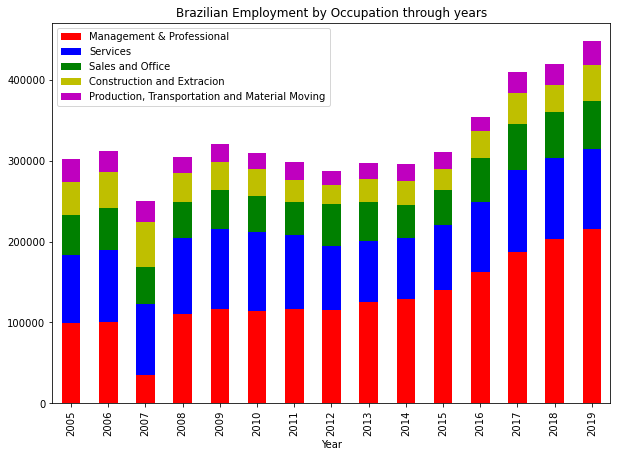

In [40]:
#cited from https://pstblog.com/2016/10/04/stacked-charts
fig, ax = plt.subplots(figsize=(10,7))  
plt.title("Brazilian Employment by Occupation through years")
State_Code = top5eo['State Code'].drop_duplicates()
margin_bottom = np.zeros(len(top5eo['Year'].drop_duplicates()))
colors = ["r", "b","g",'y','m']

for num, month in enumerate(State_Code):
    values = list(top5eo[top5eo['State Code'] == month].loc[:, 'TotalPopulation'])

    top5eo[top5eo['State Code'] == month].plot.bar(x='Year',y='TotalPopulation', ax=ax, stacked=True, 
                                    bottom = margin_bottom, color=colors[num], label=month)
    margin_bottom += values
plt.savefig('National Brazilian Employment by Occupation through years.png')
plt.show()


As shown in the graph, 'Management and Professional' is the most important occupation for brazilian community, following up is 'Services' and 'Sales and Offices'.

The employment population keeps growing through years.

The following is the same thing done on only MA data as a case study.

# For MA

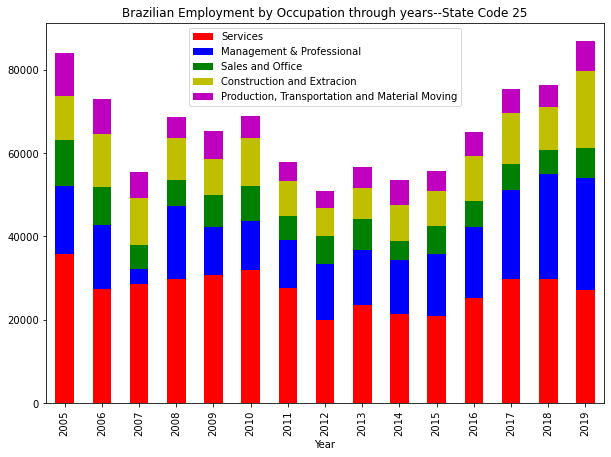

In [41]:
def eoForState(statecode):
    s=str(statecode)
    eoMA=eo[['Year','State Code',s]]
    top5eoMA=eoMA.groupby('Year')[['State Code',s]].apply(lambda x:x.sort_values(by=[s],ascending=False)[:5]).reset_index()
    fig, ax = plt.subplots(figsize=(10,7))  
    plt.title("Brazilian Employment by Occupation through years--State Code "+s)
    State_Code = top5eoMA['State Code'].drop_duplicates()
    margin_bottom = np.zeros(len(top5eoMA['Year'].drop_duplicates()))
    colors = ["r", "b","g",'y','m']

    for num, month in enumerate(State_Code):
        values = list(top5eoMA[top5eoMA['State Code'] == month].loc[:, s])

        top5eoMA[top5eoMA['State Code'] == month].plot.bar(x='Year',y=s, ax=ax, stacked=True, 
                                    bottom = margin_bottom, color=colors[num], label=month)
        margin_bottom += values
    plt.savefig('MA Brazilian Employment by Occupation through years.png')
    plt.show()
eoForState(25)   

As shown in the graph, 'Services' is the largest part contributing to Brazilian community employment in MA.